# Calculating Extreme Precipitation days using daily projections from Cal-Adapt API

In [1]:
# A 'magic' command to display plots inline
%matplotlib inline

# Import all python modules. You need to run this cell for the other cells to work.
import requests 
import numpy as np
import pandas as pd
from datetime import datetime
import itertools
import matplotlib.pyplot as plt

----
# Download data
----

Daily data is stored as a multiband raster, e.g. observed daily timeseries (1950 -2013) has 23376 bands with each band corresponding to one day, starting from 1950-01-01. Units for the observed data are mm and projected data are in kg/m2/s.

The code in the next cell contains a bunch of functions to:
    - fetch daily data given a slug and params
    - convert units to inches
    - return a new Pandas dataframe that contains all the data

In [2]:
# Cal-Adapt API
api = 'http://api.cal-adapt.org/api'

# Request header
headers = {'ContentType': 'json'}

# Params
point = 'POINT(-121.4687 38.5938)'
params = {'g': point}

def mm_to_inches(val):
    return val * 0.0393701

def kgm2s_to_inches(val):
    return  (val * 86400) * 0.0393701

def kgm2s_to_mm(val):
    return  (val * 86400)

In [3]:
def process_daily_data(slug, params):
    # Make request
    url = api + '/series/' + slug + '/rasters/'
    response = requests.get(url, params=params)
    
    # Get data
    if response.ok:
        print('Processing:', slug)
        json = response.json()
        data = json['results'][0]

        # Multiband raster data is returned by the API as a 3D array having a shape like (233376, 1, 1)
        # Flatten the 3D array into a 1D array
        values_arr = np.array(data['image'])
        values_arr = values_arr.flatten()

        # Get total number of values -> number of days
        length = len(values_arr)

        # Get start date of timeseries
        start_date = datetime.strptime(data['event'], '%Y-%m-%d')

        # Create new pandas dataframe and map each value in list to a date index
        df = pd.DataFrame(
            values_arr,
            index=pd.date_range(start_date, freq='1D', periods=length),
            columns=['value'],
        )

        # Convert units to Fahrenheit
        units = data['units']
        #if units == 'mm':
        #    df.value = df.value.apply(lambda x: mm_to_inches(x))
        if units == 'kg/m2/s':
            df.value = df.value.apply(lambda x: kgm2s_to_mm(x))
        else:
            pass
            
        # Add slug as a column
        df['series'] = slug.split('_')[2]
        
        # Add wateryear as a column
        df['year'] = df.index.year
        df['month'] = df.index.month
        df['wateryear'] = np.where(df['month'] > 9, df['year'] + 1, df['year'])

    else:
        print('Failed to download:', slug)
            
    # Combine all the dataframes into one and return
    return df

In [4]:
def get_observed():
    # Create slug
    slug = 'pr_day_livneh'
    df = process_daily_data(slug, params)
    return df

### Download observed daily timeseries

In [5]:
observedDF = get_observed()
observedDF

Processing: pr_day_livneh


,value,series,year,month,wateryear
1950-01-01,0.555716,livneh,1950,1,1950
1950-01-02,0.990185,livneh,1950,1,1950
1950-01-03,0.000000,livneh,1950,1,1950
1950-01-04,0.000000,livneh,1950,1,1950
1950-01-05,0.000000,livneh,1950,1,1950
1950-01-06,0.000000,livneh,1950,1,1950
1950-01-07,7.082851,livneh,1950,1,1950
1950-01-08,5.789548,livneh,1950,1,1950
1950-01-09,1.111432,livneh,1950,1,1950
1950-01-10,16.267319,livneh,1950,1,1950


### Download projected daily timeseries

The projected daily timeseries are form 2006 - 2099/2100 and units are in kg/m2/s. You can easily modify the code to add/subtract models, scenarios, climate variables

In [6]:
def get_projections():
    # Create an empty list to hold dataframes
    df_list = []

    # Make a combined list of GCMs, scenarios, climate variables for looping
    climvar = ['pr']
    period = ['day']
    models = ['CNRM-CM5']
    scenarios = ['rcp45', 'historical']
    zipped = itertools.product(climvar, period, models, scenarios)
    
    # Request parameters
    params = {'g': point}

    # Loop through zipped
    for item in zipped:
        # Create slug
        slug = '_'.join(item)
        df = process_daily_data(slug, params)
        df_list.append(df)
            
    # Combine all the dataframes into one and return
    return pd.concat(df_list)

In [7]:
projectedDF = get_projections()
projectedDF

Processing: pr_day_CNRM-CM5_rcp45
Processing: pr_day_CNRM-CM5_historical


,value,series,year,month,wateryear
2006-01-01,0.000000,CNRM-CM5,2006,1,2006
2006-01-02,0.000000,CNRM-CM5,2006,1,2006
2006-01-03,0.000000,CNRM-CM5,2006,1,2006
2006-01-04,0.000000,CNRM-CM5,2006,1,2006
2006-01-05,0.000000,CNRM-CM5,2006,1,2006
2006-01-06,0.000000,CNRM-CM5,2006,1,2006
2006-01-07,0.000000,CNRM-CM5,2006,1,2006
2006-01-08,0.000000,CNRM-CM5,2006,1,2006
2006-01-09,0.000000,CNRM-CM5,2006,1,2006
2006-01-10,0.012259,CNRM-CM5,2006,1,2006


In [8]:
# Combine observed and projected data into a single dataframe
df = pd.concat([observedDF, projectedDF])
df

,value,series,year,month,wateryear
1950-01-01,0.555716,livneh,1950,1,1950
1950-01-02,0.990185,livneh,1950,1,1950
1950-01-03,0.000000,livneh,1950,1,1950
1950-01-04,0.000000,livneh,1950,1,1950
1950-01-05,0.000000,livneh,1950,1,1950
1950-01-06,0.000000,livneh,1950,1,1950
1950-01-07,7.082851,livneh,1950,1,1950
1950-01-08,5.789548,livneh,1950,1,1950
1950-01-09,1.111432,livneh,1950,1,1950
1950-01-10,16.267319,livneh,1950,1,1950


----
# Number of Extreme Precipitation Days
----

Using a baseline period of wateryears 1961 - 1990, calculate the 90th, 95th and 99th percentiles of daily precipitation values within a water year from the observed data. Count number of days with values above threshold.

In [10]:
# CALCULATE THRESHOLDS
# Filter data by baseline time period
baselineDF = df.loc[(df['wateryear'] >= 1961) & (df['wateryear'] <= 1990) & (df['series'] == 'livneh')]
# Filter out zero precip values
baselineDF = baselineDF.loc[(baselineDF['value'] > 0)]
threshold90 = baselineDF['value'].quantile(0.90, interpolation='linear')
threshold95 = baselineDF['value'].quantile(0.95, interpolation='linear')
threshold99 = baselineDF['value'].quantile(0.99, interpolation='linear')
print('90th Percentile Threshold is', round(threshold90, 2), 'mm/day')
print('95th Percentile Threshold is', round(threshold95, 2), 'mm/day')
print('99th Percentile Threshold is', round(threshold99, 2), 'mm/day')

90th Percentile Threshold is 15.76 mm/day
95th Percentile Threshold is 22.2 mm/day
99th Percentile Threshold is 39.78 mm/day


In [11]:
# SELECT 90TH PERCENTILE THRESHOLD
threshold = threshold90

In [12]:
# FILTER DAYS > THRESHOLD
days = pd.DataFrame(df[df.value > threshold])
days

,value,series,year,month,wateryear
1950-01-10,16.267319,livneh,1950,1,1950
1950-02-03,19.834225,livneh,1950,2,1950
1950-02-04,20.328022,livneh,1950,2,1950
1950-10-25,16.344082,livneh,1950,10,1951
1950-10-26,22.914513,livneh,1950,10,1951
1950-11-17,30.419109,livneh,1950,11,1951
1950-11-18,25.424784,livneh,1950,11,1951
1950-12-03,20.133783,livneh,1950,12,1951
1950-12-14,20.663860,livneh,1950,12,1951
1951-04-28,20.187885,livneh,1951,4,1951


In [13]:
# Group by wateryear and count number of days for each wateryear
days_count_by_year = days.groupby(['series', 'wateryear'])['value'].count()

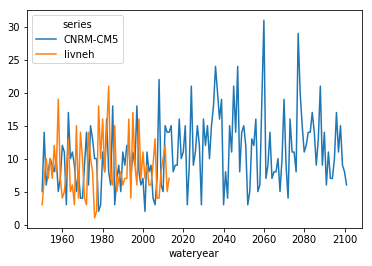

In [14]:
# Plot Number of Extreme Precipitation Days by Year
days_count_by_year.unstack('series').plot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10eeb1d30>,
      dtype=object)

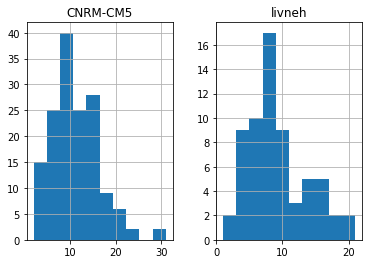

In [15]:
# Plot Histogram of Number of Extreme Precipitation Days by Year
days_count_by_year.unstack('series').hist()

----
# Extreme Value Analysis
----

In [15]:
baselineDF.to_csv('baseline.csv')

In [16]:
from scipy.stats.distributions import genextreme
from scipy.stats.distributions import genpareto
from scipy.stats.distributions import betaprime
from scipy.stats.distributions import lomax
from lmoments3 import distr, lmom_ratios

### Approach 1: Block Maxima/Annual Maximum Series (AMS)

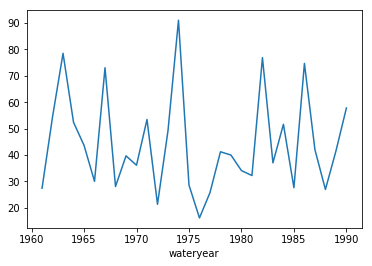

In [17]:
# Create Annual Maximum Series
baselineDF_max = baselineDF.groupby('wateryear').value.max()
baselineDF_max.plot()

In [18]:
# Create an array of maximum values 
AMS = list(baselineDF_max)

### Using SciPy

(-0.07499606867274433, 35.39082789501435, 13.692202391926685)


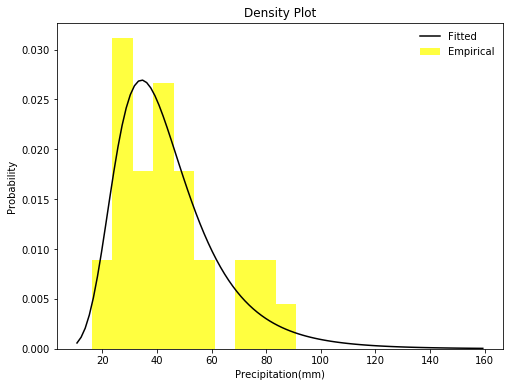

In [73]:
# Calculate distribution parameters
params = genextreme.fit(AMS)
c, loc, scale = params
print(params)

# Fit of GEV distribution based on MLE estimation (default in SciPy)
gev_fit = genextreme(*params)

# DENSITY PLOT 

# x axis values for plot
x = np.linspace(gev_fit.ppf(0.001), gev_fit.ppf(0.999), 100)

# plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(x, gev_fit.pdf(x), label = 'Fitted', color = 'k')
ax.hist(AMS, density = True, 
                color = 'yellow', alpha = 0.75, label = "Empirical")
ax.set_title('Density Plot')
ax.set_xlabel('Precipitation(mm)')
ax.set_ylabel('Probability')
ax.legend(loc='best', frameon=False) 

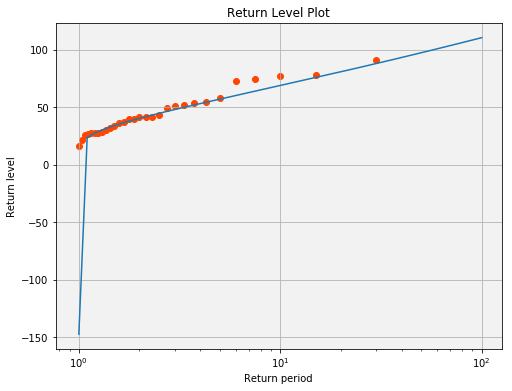

In [20]:
# RETURN VALUE PLOT

# Value indicating the frecuency of events per year
# frec of 1 => yearly data (1 value per year)
frec = 1

# x axis values for plot
T = np.arange(0.1, 100.1, 0.1)
sT = gev_fit.isf(frec * 1./T)
N = np.r_[1:len(AMS)+1] * frec
Nmax = max(N)

 # plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_facecolor((0.95, 0.95, 0.95))
plt.setp(ax.lines, linewidth = 2, color = 'magenta')
ax.set_title('Return Level Plot')
ax.set_xlabel('Return period')
ax.set_ylabel('Return level')
ax.grid(True)
ax.semilogx(T, sT)
ax.scatter(frec * Nmax/N, sorted(AMS)[::-1], color = 'orangered')

In [21]:
# Get Return Levels (precipitation values) for Return Periods
print('2-year Return Level = ', gev_fit.isf(1./2), 'mm')
print('5-year Return Level = ', gev_fit.isf(1./5), 'mm')
print('10-year Return Level = ', gev_fit.isf(1./10), 'mm')
print('20-year Return Level = ', gev_fit.isf(1./20), 'mm')
print('50-year Return Level = ', gev_fit.isf(1./50), 'mm')
print('100-year Return Level = ', gev_fit.isf(1./100), 'mm')

2-year Return Level =  40.478803302544385 mm
5-year Return Level =  57.12799559506954 mm
10-year Return Level =  68.95606152867694 mm
20-year Return Level =  80.94477508441247 mm
50-year Return Level =  97.4557225397771 mm
100-year Return Level =  110.60698529929579 mm


### Using lmoments3

In [22]:
# Calculate distribution parameters
params = distr.gev.lmom_fit(AMS)

# Fit of GEV distribution based on L-moments estimation
gev_fit = distr.gev(**params)

print(params)

OrderedDict([('c', -0.06646490493532098), ('loc', 35.17496028717488), ('scale', 14.255160532516085)])


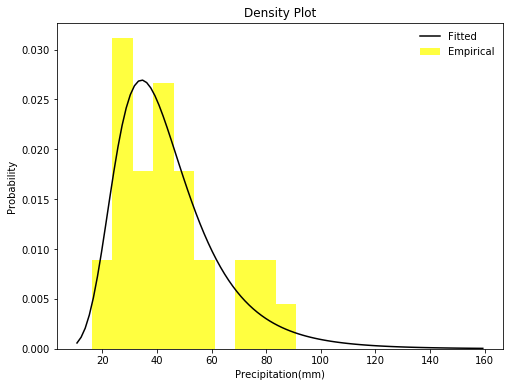

In [92]:
# DENSITY PLOT

# x axis values for plot
x = np.linspace(gev_fit.ppf(0.001), gev_fit.ppf(0.999), 100)

# plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(x, gev_fit.pdf(x), label = 'Fitted', color = 'k')
ax.hist(AMS, density = True, 
                color = 'yellow', alpha = 0.75, label = "Empirical")
ax.set_title('Density Plot')
ax.set_xlabel('Precipitation(mm)')
ax.set_ylabel('Probability')
ax.legend(loc='best', frameon=False)  

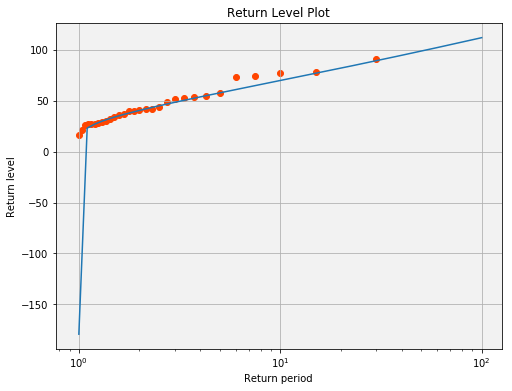

In [24]:
# RETURN VALUE PLOT

# Value indicating the frecuency of events per year
# frec of 1 => yearly data (1 value per year)
frec = 1

# x axis values for plot
T = np.arange(0.1, 100.1, 0.1)
sT = gev_fit.isf(frec * 1./T)
N = np.r_[1:len(AMS)+1] * frec
Nmax = max(N)

 # plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_facecolor((0.95, 0.95, 0.95))
plt.setp(ax.lines, linewidth = 2, color = 'magenta')
ax.set_title('Return Level Plot')
ax.set_xlabel('Return period')
ax.set_ylabel('Return level')
ax.grid(True)
ax.semilogx(T, sT)
ax.scatter(frec * Nmax/N, sorted(AMS)[::-1], color = 'orangered')

In [25]:
# Get Return Levels (precipitation values) for Return Periods
print('2-year Return Level = ', gev_fit.isf(1./2), 'mm')
print('5-year Return Level = ', gev_fit.isf(1./5), 'mm')
print('10-year Return Level = ', gev_fit.isf(1./10), 'mm')
print('20-year Return Level = ', gev_fit.isf(1./20), 'mm')
print('50-year Return Level = ', gev_fit.isf(1./50), 'mm')
print('100-year Return Level = ', gev_fit.isf(1./100), 'mm')

2-year Return Level =  40.46381820746788 mm
5-year Return Level =  57.65898057842782 mm
10-year Return Level =  69.7775882931177 mm
20-year Return Level =  81.98402437963873 mm
50-year Return Level =  98.67651281017964 mm
100-year Return Level =  111.88050732172229 mm


### Approach 2: Peak Over Threshold/Parital Duration Series (PDS)

In [27]:
# CREATE PARTIAL DURATION SERIES

# Select threshold value

# Method 1 - Often the lowest value from the Annual Maximum Series is used as the threshold
min_AMS = np.min(AMS)

# Method 2 - Use a percentile threshold from all values

print(min_AMS, threshold90)

16.133459091186523 15.76212215423584


In [34]:
th = min_AMS

In [32]:
PDS = baselineDF['value'].values
print('Number of observations in PDS =', len(PDS))

Number of observations in PDS = 2661


### Using SciPy

In [80]:
# Calculate distribution parameters
params = genpareto.fit(PDS[PDS > th] - th)
print(params)

# Fit of GEV distribution based on MLE estimation (default in SciPy)
gpa_fit = genpareto(*params)

(0.12855457595517505, 0.03281970321648872, 9.001794738459953)


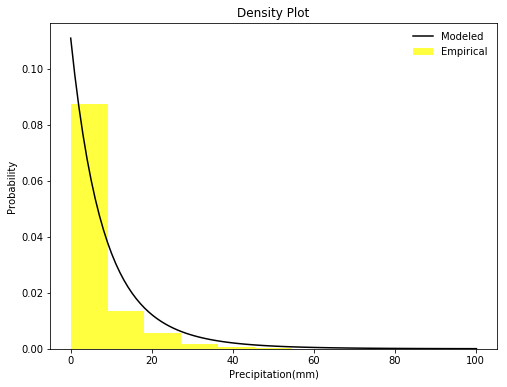

In [81]:
# DENSITY PLOT

# x axis values for plot
x = np.linspace(gpa_fit.ppf(0.001), gpa_fit.ppf(0.999), 100)

# plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(x, gpa_fit.pdf(x), label = 'Modeled', color = 'k')
ax.hist(PDS, density = True, color = 'yellow', alpha = 0.75, label = "Empirical")
ax.set_title('Density Plot')
ax.set_xlabel('Precipitation(mm)')
ax.set_ylabel('Probability')
ax.legend(loc='best', frameon=False) 

In [82]:
# Function adapted from https://github.com/wcarthur/extremes

def returnLevels(intervals, mu, xi, sigma, rate, npyr):
    """
    Calculate return levels for specified intervals for a generalised pareto
    distribution with the given threshold, scale and shape parameters.

    :param intervals: :class:`numpy.ndarray` or float of recurrence intervals
              to evaluate return levels for.
    :param float mu: Threshold parameter (also called location).
    :param float xi: Shape parameter.
    :param float sigma: Scale parameter.
    :param float rate: Rate of exceedances (i.e. number of observations greater
                       than `mu`, divided by total number of observations).
    :param float npyr: Number of observations per year.

    :returns: return levels for the specified recurrence intervals.

    """

    rlevels = mu + (sigma / xi) * (np.power(intervals * npyr * rate, xi) - 1.)
    return rlevels

def empReturnPeriod(data, npyr):
    """
    Returns the empirically-based recurrence interval (in years) for a set
    of observations.

    It is assumed the data are daily observations. If the observations are not
    daily, there are two options: set the ``npyr`` variable, or backfill the
    ``data`` variable with zero values to match the assumed length of the
    record.

    The highest return period should be (approximately) len(``data``)/``npyr``.

    :param data: :class:`numpy.ndarray` containing the observed values (with
                 missing values removed).
    :param float npy: Number of observations per year (default=365.25)

    :returns: Recurrence intervals for the observed data.
    :rtype: :class:`numpy.ndarray`
    """
    nobs = len(data)
    # Empirical return periods:
    emprp = 1. / (1. - np.arange(1, nobs + 1, 1) / (nobs + 1)) / npyr
    return emprp

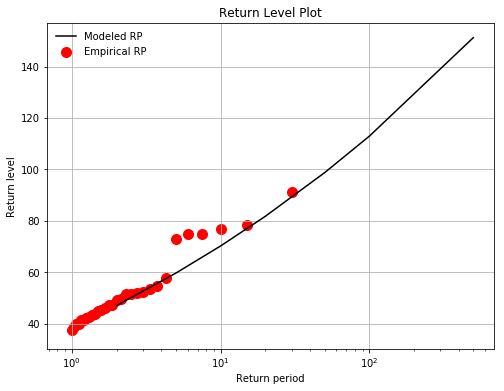

In [83]:
# RETURN VALUE PLOT

# x axis values for plot
rp = np.array([2, 5, 10, 20, 50, 100, 500])
rate = float(len(PDS[PDS > th])) / float(len(PDS))
npyr = len(PDS) / 30
rval = returnLevels(rp, th, params[0], params[2], rate, npyr)

emprp = empReturnPeriod(PDS, npyr)
sortedmax = np.sort(PDS)

 # plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title('Return Level Plot')
ax.set_xlabel('Return period')
ax.set_ylabel('Return level')
ax.grid(True)
ax.semilogx(rp, rval, label = 'Modeled RP', color = 'k')
ax.scatter(emprp[emprp > 1], sortedmax[emprp > 1], s=100, color='r', label="Empirical RP")
ax.legend(loc='best', frameon=False) 

In [84]:
# Get Return Levels (precipitation values) for Return Periods
print('2-year Return Level = ', rval[0], 'mm')
print('5-year Return Level = ', rval[1], 'mm')
print('10-year Return Level = ', rval[2], 'mm')
print('20-year Return Level = ', rval[3], 'mm')
print('50-year Return Level = ', rval[4], 'mm')
print('100-year Return Level = ', rval[5], 'mm')

2-year Return Level =  47.00251962086676 mm
5-year Return Level =  59.61521695882149 mm
10-year Return Level =  70.19363332176974 mm
20-year Return Level =  81.75793573360947 mm
50-year Return Level =  98.71546402162889 mm
100-year Return Level =  112.93794077744005 mm


### Using lmoments3

In [87]:
# Calculate distribution parameters
params = distr.gpa.lmom_fit(PDS[PDS > th] - th)

# Fit of Generalised Pareto distribution based on L-moments estimation
gpa_fit = distr.gpa(**params)

print(params)

OrderedDict([('c', 0.1580865352069093), ('loc', 0.19559162245895578), ('scale', 8.539164890068971)])


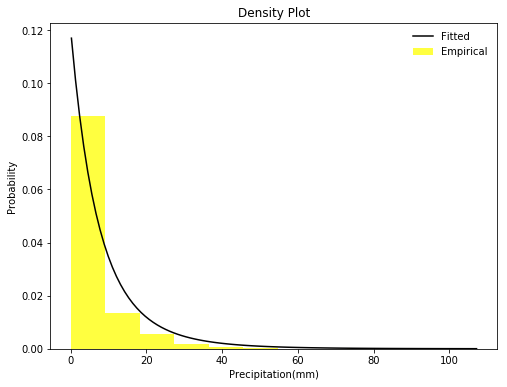

In [89]:
# DENSITY PLOT

# x axis values for plot
x = np.linspace(gpa_fit.ppf(0.001), gpa_fit.ppf(0.999), 100)

# plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(x, gpa_fit.pdf(x), label = 'Fitted', color = 'k')
ax.hist(PDS, density = True, 
                color = 'yellow', alpha = 0.75, label = "Empirical")
ax.set_title('Density Plot')
ax.set_xlabel('Precipitation(mm)')
ax.set_ylabel('Probability')
ax.legend(loc='best', frameon=False) 

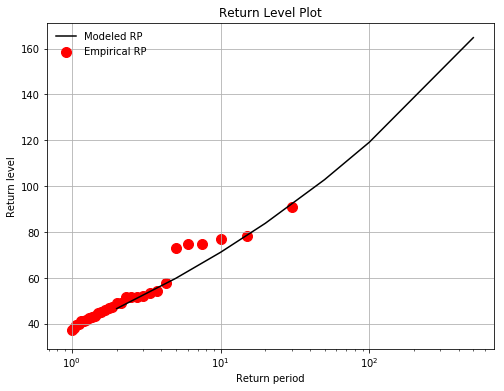

In [90]:
# RETURN VALUE PLOT

# x axis values for plot
rp = np.array([2, 5, 10, 20, 50, 100, 500])
rate = float(len(PDS[PDS > th])) / float(len(PDS))
npyr = len(PDS) / 30
rval = returnLevels(rp, th, params['c'], params['scale'], rate, npyr)

emprp = empReturnPeriod(PDS, npyr)
sortedmax = np.sort(PDS)

 # plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title('Return Level Plot')
ax.set_xlabel('Return period')
ax.set_ylabel('Return level')
ax.grid(True)
ax.semilogx(rp, rval, label = 'Modeled RP', color = 'k')
ax.scatter(emprp[emprp > 1], sortedmax[emprp > 1], s=100, color='r', label="Empirical RP")
ax.legend(loc='best', frameon=False) 

In [91]:
# Get Return Levels (precipitation values) for Return Periods
print('2-year Return Level = ', rval[0], 'mm')
print('5-year Return Level = ', rval[1], 'mm')
print('10-year Return Level = ', rval[2], 'mm')
print('20-year Return Level = ', rval[3], 'mm')
print('50-year Return Level = ', rval[4], 'mm')
print('100-year Return Level = ', rval[5], 'mm')

2-year Return Level =  46.757432409951065 mm
5-year Return Level =  59.950220340009196 mm
10-year Return Level =  71.27983797714901 mm
20-year Return Level =  83.92149612639274 mm
50-year Return Level =  102.9070432255936 mm
100-year Return Level =  119.21132935572827 mm
